# Data Preprocessing and Visualization

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#making necessary imports
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import *
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
from matplotlib import pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy
import  os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
import shutil
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
# import pydot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from tqdm import tqdm, tqdm_notebook
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

print("All modules have been imported")

All modules have been imported


In [ ]:
#preprocessing the images and adding them to a list
x_dataset=[]
y_dataset=[]
src=os.listdir('/content/gdrive/MyDrive/Breast MRI Data Analysis/Healthy')
i=0
for filename in src:
    full_file_name='/content/gdrive/MyDrive/Breast MRI Data Analysis/Healthy/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=1
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1


In [ ]:
#preprocessing the images and adding them to a list
src=os.listdir('/content/gdrive/MyDrive/Breast MRI Data Analysis/Sick')
for filename in src:
    full_file_name='/content/gdrive/MyDrive/Breast MRI Data Analysis/Sick/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=0
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1

In [ ]:
#converting the lists to a numpy array
X_dataset=np.array(x_dataset)
Y_dataset=np.array(y_dataset)
Y_dataset=Y_dataset.reshape((1480,1))

In [ ]:
#shuffling the numpy array so that the healthy and sick attributes get mixed
from sklearn.utils import shuffle
X_dataset,Y_dataset=shuffle(X_dataset,Y_dataset,random_state=0)

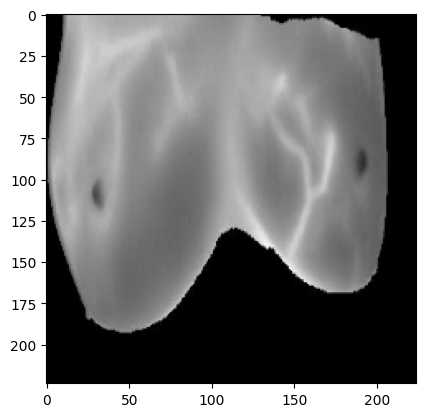

In [ ]:
#plotting the Image
import matplotlib.pyplot as plt
plt.imshow(X_dataset[60])
plt.show()

In [ ]:
X_dataset[60].shape

(224, 224, 3)

In [ ]:
Healthy_len=0
Sick_len=0
for i in range(1480):
    if Y_dataset[i]==0:
        Sick_len+=1
    else:
        Healthy_len+=1
print(Healthy_len)
print(Sick_len)

740
740


<Axes: >

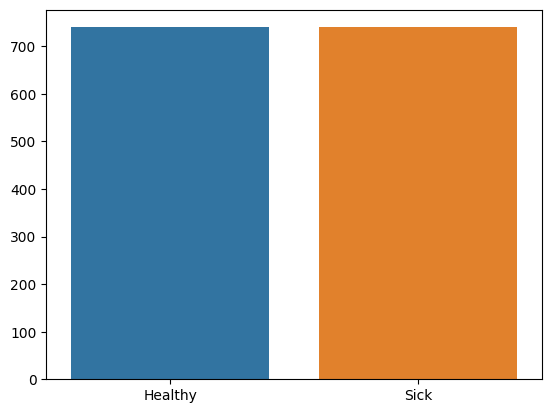

In [ ]:
#checking the distribution of healthy and sick images
import seaborn as sns
sns.barplot(x=['Healthy','Sick'],y=[Healthy_len,Sick_len])

In [ ]:
#splitting the data into train,validation and test in 80:10:10 ratio
from sklearn.model_selection import train_test_split
X_train, X_rem, Y_train, Y_rem = train_test_split(X_dataset,Y_dataset,train_size=0.8)

In [ ]:
test_size = 0.5
X_val, X_test, Y_val, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

<Axes: >

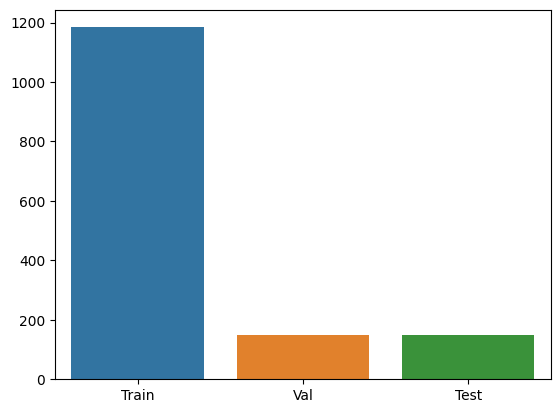

In [ ]:
import seaborn as sns
sns.barplot(x=['Train','Val','Test'],y=[len(X_train),len(X_val),len(X_test)])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
def plot_samples(X, y, labels_dict=10, n=10):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(10):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(54,25))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.show()

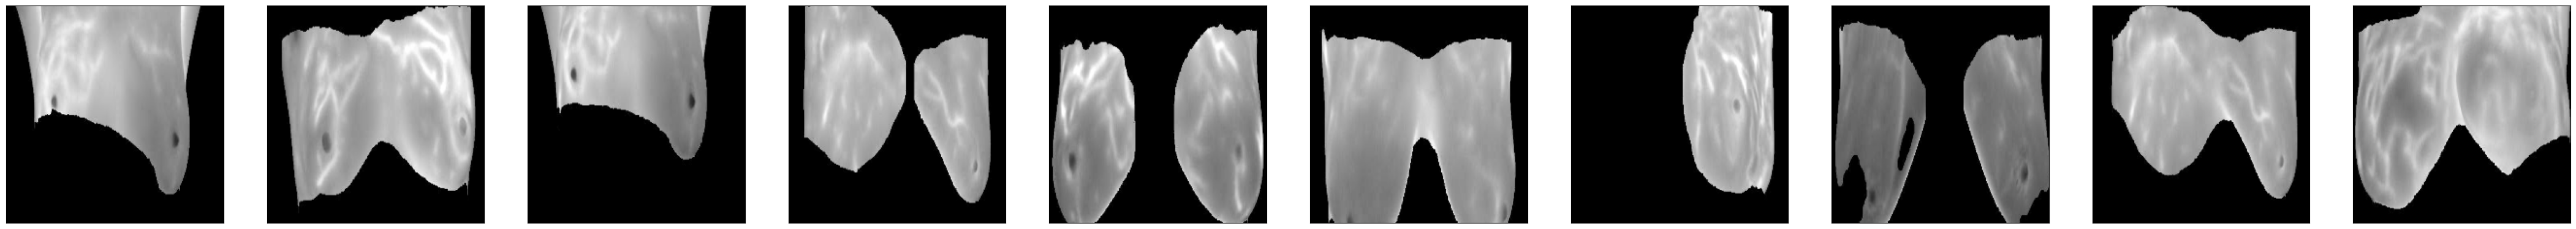

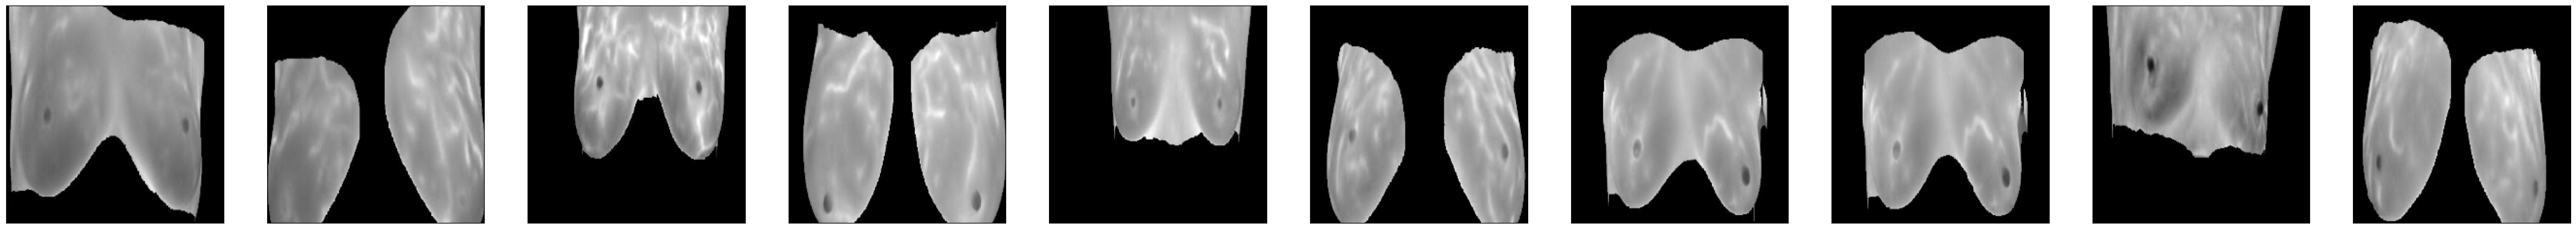

<Figure size 5400x2500 with 0 Axes>

<Figure size 5400x2500 with 0 Axes>

<Figure size 5400x2500 with 0 Axes>

<Figure size 5400x2500 with 0 Axes>

<Figure size 5400x2500 with 0 Axes>

<Figure size 5400x2500 with 0 Axes>

<Figure size 5400x2500 with 0 Axes>

<Figure size 5400x2500 with 0 Axes>

In [ ]:
plot_samples(X_train,Y_train, 10, 10)

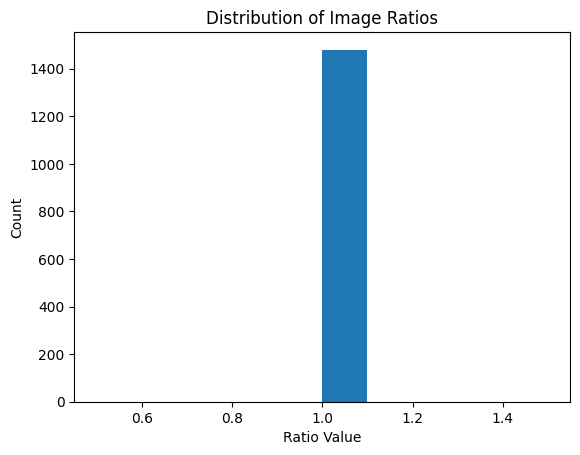

In [ ]:
#checking if all the images are of the same size or not
RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])

plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [ ]:
IMG_SIZE = (224,224)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  rotation_range=8,
                                     width_shift_range=0.03,
                                     height_shift_range=0.03,
                                     shear_range=0.25,
                                     zoom_range=0.45,
                                     horizontal_flip=True)
val_datagen = ImageDataGenerator(zoom_range=0.45)

In [ ]:
#Defining the Classifiers
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier",
        "XGB Classifier",
        "ANN Classifier",
        "BaggingClassifier"
         ]
classifiers = [
    KNeighborsClassifier(),
    SVC(probability = True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier(),
    BaggingClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)

    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    y_pred_train = [1 if x>0.5 else 0 for x in y_pred_train]
    y_pred_val = [1 if x>0.5 else 0 for x in y_pred_val]
    y_pred_test = [1 if x>0.5 else 0 for x in y_pred_test]

    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)


    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)

    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2)
    test_roc_auc = metrics.roc_auc_score(y_test, y_pred_test ,multi_class='ovo', average='weighted')

    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    confusion_mtx = confusion_matrix(y_train, y_pred_train)
    # cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    # confusion_mtx = confusion_matrix(y_val, y_pred_val)
    # cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))

    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    print("ROC AUC score : {}".format(test_roc_auc))
    confusion_mtx = confusion_matrix(y_test, y_pred_test)
    # cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

    print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred_test))

    print("-"*80)
    print()


In [ ]:
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [ ]:
def print_performance_metrics(y_test, y_pred):
    print('Test_Accuracy:', np.round(metrics.accuracy_score(y_test,y_pred),4))
    print('Precision:', np.round(metrics.precision_score(y_test,y_pred,average = 'weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test,y_pred,average = 'weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test,y_pred,average = 'weighted'),4))
    print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test,y_pred)))
    print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test,y_pred)))
    print('\t\tClassification Report:\n', metrics.classification_report(y_pred,y_test))

In [ ]:
X_train_prep=X_train
X_val_prep=X_val
X_test_prep=X_test

#VGG19

In [ ]:
from keras.applications.vgg19 import VGG19
base_model= VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train)
val_features=model_feat.predict(X_val)
test_features=model_feat.predict(X_test)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 1s 130ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 98.4%
------------------------ Validation Set Metrics------------------------

Accuracy score : 98.65%
------------------------ Test Set Metrics------------------------

Accuracy score : 97.97%
F1_score : 0.98
Kappa Score : 0.96 
Recall score: 0.98
Precision score : 0.98
ROC AUC score : 0.9801916344204901
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        67
         1.0       0.99      0.98      0.98        81

    accuracy                           0.98       148
   macro avg       0.98      0.98      0.98       148
weighted avg       0.98      0.98      0.98       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 81.25%
------------------------ Validation Set Metrics------------------------

Accuracy score : 81.08%
------------------------ Test Set Metrics------------------------

Accuracy score : 81.08%
F1_score : 0.81
Kappa Score : 0.62 
Recall score: 0.81
Precision score : 0.81
ROC AUC score : 0.8129721761562557
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        67
         1.0       0.85      0.79      0.82        81

    accuracy                           0.81       148
   macro avg       0.81      0.81      0.81       148
weighted avg       0.81      0.81      0.81       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 95.95%
------------------------ Test Set Metrics------------------------

Accuracy score : 97.97%
F1_score : 0.98
Kappa Score : 0.96 
Recall score: 0.98
Precision score : 0.98
ROC AUC score : 0.9801916344204901
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        67
         1.0       0.99      0.98      0.98        81

    accuracy                           0.98       148
   macro avg       0.98      0.98      0.98       148
weighted avg       0.98      0.98      0.98       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 84.04%
------------------------ Validation Set Metrics------------------------

Accuracy score : 80.41%
------------------------ Test Set Metrics------------------------

Accuracy score : 82.43%
F1_score : 0.82
Kappa Score : 0.65 
Recall score: 0.82
Precision score : 0.83
ROC AUC score : 0.8291873963515755
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.88      0.82        67
         1.0       0.89      0.78      0.83        81

    accuracy                           0.82       148
   macro avg       0.83      0.83      0.82       148
weighted avg       0.83      0.82      0.82       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Acc

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 97.64%
------------------------ Validation Set Metrics------------------------

Accuracy score : 93.92%
------------------------ Test Set Metrics------------------------

Accuracy score : 96.61999999999999%
F1_score : 0.97
Kappa Score : 0.93 
Recall score: 0.97
Precision score : 0.97
ROC AUC score : 0.9691358024691358
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        67
         1.0       1.00      0.94      0.97        81

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics--------------

# ResNet101

In [ ]:
base_model= ResNet101(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 1s 143ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 96.78999999999999%
------------------------ Validation Set Metrics------------------------

Accuracy score : 97.97%
------------------------ Test Set Metrics------------------------

Accuracy score : 96.61999999999999%
F1_score : 0.97
Kappa Score : 0.93 
Recall score: 0.97
Precision score : 0.97
ROC AUC score : 0.9639764142251704
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        67
         1.0       0.95      0.99      0.97        81

    accuracy                           0.97       148
   macro avg       0.97      0.96      0.97       148
weighted avg       0.97      0.97      0.97       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 74.32%
------------------------ Validation Set Metrics------------------------

Accuracy score : 75.68%
------------------------ Test Set Metrics------------------------

Accuracy score : 70.95%
F1_score : 0.71
Kappa Score : 0.41 
Recall score: 0.71
Precision score : 0.71
ROC AUC score : 0.7036115717707758
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.64      0.67        67
         1.0       0.72      0.77      0.74        81

    accuracy                           0.71       148
   macro avg       0.71      0.70      0.70       148
weighted avg       0.71      0.71      0.71       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 94.59%
------------------------ Test Set Metrics------------------------

Accuracy score : 88.51%
F1_score : 0.89
Kappa Score : 0.77 
Recall score: 0.89
Precision score : 0.89
ROC AUC score : 0.888612493090105
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.88        67
         1.0       0.93      0.85      0.89        81

    accuracy                           0.89       148
   macro avg       0.89      0.89      0.88       148
weighted avg       0.89      0.89      0.89       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 87.83999999999999%
------------------------ Validation Set Metrics------------------------

Accuracy score : 82.43%
------------------------ Test Set Metrics------------------------

Accuracy score : 75.68%
F1_score : 0.76
Kappa Score : 0.51 
Recall score: 0.76
Precision score : 0.76
ROC AUC score : 0.7558503777409249
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.75      0.74        67
         1.0       0.78      0.77      0.77        81

    accuracy                           0.76       148
   macro avg       0.75      0.76      0.76       148
weighted avg       0.76      0.76      0.76       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics-----------------

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 91.22%
------------------------ Validation Set Metrics------------------------

Accuracy score : 85.81%
------------------------ Test Set Metrics------------------------

Accuracy score : 88.51%
F1_score : 0.89
Kappa Score : 0.77 
Recall score: 0.89
Precision score : 0.89
ROC AUC score : 0.888612493090105
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.88        67
         1.0       0.93      0.85      0.89        81

    accuracy                           0.89       148
   macro avg       0.89      0.89      0.88       148
weighted avg       0.89      0.89      0.89       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

A

#ResNet50

In [ ]:
base_model= ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 0s 80ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 95.35%
------------------------ Validation Set Metrics------------------------

Accuracy score : 95.27%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.27%
F1_score : 0.95
Kappa Score : 0.9 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.9503408881518334
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        67
         1.0       0.94      0.98      0.96        81

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 70.02000000000001%
------------------------ Validation Set Metrics------------------------

Accuracy score : 75.68%
------------------------ Test Set Metrics------------------------

Accuracy score : 65.53999999999999%
F1_score : 0.65
Kappa Score : 0.3 
Recall score: 0.66
Precision score : 0.65
ROC AUC score : 0.6490694674774278
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.58      0.60        67
         1.0       0.67      0.72      0.69        81

    accuracy                           0.66       148
   macro avg       0.65      0.65      0.65       148
weighted avg       0.65      0.66      0.65       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 93.92%
------------------------ Test Set Metrics------------------------

Accuracy score : 94.59%
F1_score : 0.95
Kappa Score : 0.89 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.9467477427676433
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94        67
         1.0       0.96      0.94      0.95        81

    accuracy                           0.95       148
   macro avg       0.94      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 88.01%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.65%
------------------------ Test Set Metrics------------------------

Accuracy score : 81.08%
F1_score : 0.81
Kappa Score : 0.62 
Recall score: 0.81
Precision score : 0.81
ROC AUC score : 0.8052330937903076
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        67
         1.0       0.80      0.86      0.83        81

    accuracy                           0.81       148
   macro avg       0.81      0.81      0.81       148
weighted avg       0.81      0.81      0.81       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Acc

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 86.99%
------------------------ Validation Set Metrics------------------------

Accuracy score : 81.08%
------------------------ Test Set Metrics------------------------

Accuracy score : 85.81%
F1_score : 0.86
Kappa Score : 0.71 
Recall score: 0.86
Precision score : 0.86
ROC AUC score : 0.8574718997604569
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.84        67
         1.0       0.88      0.86      0.87        81

    accuracy                           0.86       148
   macro avg       0.86      0.86      0.86       148
weighted avg       0.86      0.86      0.86       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------



#VGG16

In [ ]:
base_model= VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 1s 114ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 98.31%
------------------------ Validation Set Metrics------------------------

Accuracy score : 97.3%
------------------------ Test Set Metrics------------------------

Accuracy score : 99.32%
F1_score : 0.99
Kappa Score : 0.99 
Recall score: 0.99
Precision score : 0.99
ROC AUC score : 0.9938271604938271
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        67
         1.0       1.00      0.99      0.99        81

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data--

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 91.3%
------------------------ Validation Set Metrics------------------------

Accuracy score : 90.53999999999999%
------------------------ Test Set Metrics------------------------

Accuracy score : 86.49%
F1_score : 0.87
Kappa Score : 0.73 
Recall score: 0.86
Precision score : 0.87
ROC AUC score : 0.8649345863276211
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85        67
         1.0       0.89      0.86      0.87        81

    accuracy                           0.86       148
   macro avg       0.86      0.86      0.86       148
weighted avg       0.87      0.86      0.87       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 94.59%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.95%
F1_score : 0.96
Kappa Score : 0.92 
Recall score: 0.96
Precision score : 0.96
ROC AUC score : 0.9603832688409804
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        67
         1.0       0.97      0.95      0.96        81

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 88.85%
------------------------ Validation Set Metrics------------------------

Accuracy score : 83.11%
------------------------ Test Set Metrics------------------------

Accuracy score : 80.41%
F1_score : 0.8
Kappa Score : 0.61 
Recall score: 0.8
Precision score : 0.8
ROC AUC score : 0.802929795467109
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.79      0.79        67
         1.0       0.82      0.81      0.82        81

    accuracy                           0.80       148
   macro avg       0.80      0.80      0.80       148
weighted avg       0.80      0.80      0.80       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accurac

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 98.65%
------------------------ Validation Set Metrics------------------------

Accuracy score : 93.24%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.27%
F1_score : 0.95
Kappa Score : 0.91 
Recall score: 0.95
Precision score : 0.96
ROC AUC score : 0.9555002763957988
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        67
         1.0       0.99      0.93      0.96        81

    accuracy                           0.95       148
   macro avg       0.95      0.96      0.95       148
weighted avg       0.96      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------



# MobileNetV2

In [ ]:
base_model= MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 0s 30ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 97.47%
------------------------ Validation Set Metrics------------------------

Accuracy score : 95.95%
------------------------ Test Set Metrics------------------------

Accuracy score : 97.3%
F1_score : 0.97
Kappa Score : 0.95 
Recall score: 0.97
Precision score : 0.97
ROC AUC score : 0.972728947853326
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        67
         1.0       0.98      0.98      0.98        81

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data---

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 96.11%
------------------------ Validation Set Metrics------------------------

Accuracy score : 92.57%
------------------------ Test Set Metrics------------------------

Accuracy score : 97.3%
F1_score : 0.97
Kappa Score : 0.95 
Recall score: 0.97
Precision score : 0.97
ROC AUC score : 0.9740187949143172
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        67
         1.0       0.99      0.96      0.97        81

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 89.19%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.95%
F1_score : 0.96
Kappa Score : 0.92 
Recall score: 0.96
Precision score : 0.96
ROC AUC score : 0.962962962962963
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        67
         1.0       1.00      0.93      0.96        81

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 84.54%
------------------------ Validation Set Metrics------------------------

Accuracy score : 80.41%
------------------------ Test Set Metrics------------------------

Accuracy score : 77.7%
F1_score : 0.78
Kappa Score : 0.56 
Recall score: 0.78
Precision score : 0.78
ROC AUC score : 0.7808181315644003
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.82      0.77        67
         1.0       0.83      0.74      0.78        81

    accuracy                           0.78       148
   macro avg       0.78      0.78      0.78       148
weighted avg       0.78      0.78      0.78       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accu

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 92.57%
------------------------ Test Set Metrics------------------------

Accuracy score : 96.61999999999999%
F1_score : 0.97
Kappa Score : 0.93 
Recall score: 0.97
Precision score : 0.97
ROC AUC score : 0.9665561083471531
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        67
         1.0       0.97      0.96      0.97        81

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics--------------

#MobileNet

In [ ]:
base_model= MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 0s 28ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 97.8%
------------------------ Validation Set Metrics------------------------

Accuracy score : 96.61999999999999%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.95%
F1_score : 0.96
Kappa Score : 0.92 
Recall score: 0.96
Precision score : 0.96
ROC AUC score : 0.9578035747189976
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.94      0.95        67
         1.0       0.95      0.98      0.96        81

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on 

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 98.4%
------------------------ Validation Set Metrics------------------------

Accuracy score : 93.24%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.27%
F1_score : 0.95
Kappa Score : 0.9 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.9542104293348075
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        67
         1.0       0.97      0.94      0.96        81

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 88.51%
------------------------ Test Set Metrics------------------------

Accuracy score : 91.22%
F1_score : 0.91
Kappa Score : 0.82 
Recall score: 0.91
Precision score : 0.91
ROC AUC score : 0.9133038511147964
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        67
         1.0       0.94      0.90      0.92        81

    accuracy                           0.91       148
   macro avg       0.91      0.91      0.91       148
weighted avg       0.91      0.91      0.91       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 87.42%
------------------------ Validation Set Metrics------------------------

Accuracy score : 79.05%
------------------------ Test Set Metrics------------------------

Accuracy score : 79.73%
F1_score : 0.8
Kappa Score : 0.59 
Recall score: 0.8
Precision score : 0.8
ROC AUC score : 0.7954671088999448
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        67
         1.0       0.81      0.81      0.81        81

    accuracy                           0.80       148
   macro avg       0.80      0.80      0.80       148
weighted avg       0.80      0.80      0.80       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accura

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 93.92%
------------------------ Test Set Metrics------------------------

Accuracy score : 94.59%
F1_score : 0.95
Kappa Score : 0.89 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.945457895706652
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        67
         1.0       0.95      0.95      0.95        81

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 99.58%
------------------------ Validation Set Metrics------------------------

Accuracy score : 84.46000000000001%
------------------------ Test Set Metrics------------------------

Accuracy score : 91.22%
F1_score : 0.91
Kappa Score : 0.82 
Recall score: 0.91
Precision score : 0.92
ROC AUC score : 0.9171733922977704
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91        67
         1.0       0.97      0.86      0.92        81

    accuracy                           0.91       148
   macro avg       0.91      0.92      0.91       148
weighted avg       0.92      0.91      0.91       148

--------------------------------------------------------------------------------



# InceptionV3

In [ ]:
base_model= InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 0s 59ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 96.37%
------------------------ Validation Set Metrics------------------------

Accuracy score : 97.3%
------------------------ Test Set Metrics------------------------

Accuracy score : 93.92%
F1_score : 0.94
Kappa Score : 0.88 
Recall score: 0.94
Precision score : 0.94
ROC AUC score : 0.9354155150175051
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93        67
         1.0       0.92      0.98      0.95        81

    accuracy                           0.94       148
   macro avg       0.94      0.94      0.94       148
weighted avg       0.94      0.94      0.94       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data--

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 97.55%
------------------------ Validation Set Metrics------------------------

Accuracy score : 93.24%
------------------------ Test Set Metrics------------------------

Accuracy score : 89.86%
F1_score : 0.9
Kappa Score : 0.79 
Recall score: 0.9
Precision score : 0.9
ROC AUC score : 0.8957987838584854
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89        67
         1.0       0.89      0.93      0.91        81

    accuracy                           0.90       148
   macro avg       0.90      0.90      0.90       148
weighted avg       0.90      0.90      0.90       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 93.24%
------------------------ Test Set Metrics------------------------

Accuracy score : 87.83999999999999%
F1_score : 0.88
Kappa Score : 0.76 
Recall score: 0.88
Precision score : 0.88
ROC AUC score : 0.8785701124009581
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87        67
         1.0       0.90      0.88      0.89        81

    accuracy                           0.88       148
   macro avg       0.88      0.88      0.88       148
weighted avg       0.88      0.88      0.88       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 84.8%
------------------------ Validation Set Metrics------------------------

Accuracy score : 76.35%
------------------------ Test Set Metrics------------------------

Accuracy score : 73.65%
F1_score : 0.74
Kappa Score : 0.47 
Recall score: 0.74
Precision score : 0.74
ROC AUC score : 0.7373318592224064
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.75      0.72        67
         1.0       0.78      0.73      0.75        81

    accuracy                           0.74       148
   macro avg       0.74      0.74      0.74       148
weighted avg       0.74      0.74      0.74       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accu

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 95.95%
------------------------ Test Set Metrics------------------------

Accuracy score : 91.22%
F1_score : 0.91
Kappa Score : 0.82 
Recall score: 0.91
Precision score : 0.91
ROC AUC score : 0.9120140040538051
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.91      0.90        67
         1.0       0.93      0.91      0.92        81

    accuracy                           0.91       148
   macro avg       0.91      0.91      0.91       148
weighted avg       0.91      0.91      0.91       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------



# InceptionResNetV2

In [ ]:
base_model= InceptionResNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 1s 143ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 97.47%
------------------------ Validation Set Metrics------------------------

Accuracy score : 98.65%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.27%
F1_score : 0.95
Kappa Score : 0.9 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.9528824833702882
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96        82
         1.0       0.94      0.95      0.95        66

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 94.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 89.19%
------------------------ Test Set Metrics------------------------

Accuracy score : 89.19%
F1_score : 0.89
Kappa Score : 0.78 
Recall score: 0.89
Precision score : 0.89
ROC AUC score : 0.8891352549889137
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        82
         1.0       0.89      0.86      0.88        66

    accuracy                           0.89       148
   macro avg       0.89      0.89      0.89       148
weighted avg       0.89      0.89      0.89       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 91.89%
------------------------ Test Set Metrics------------------------

Accuracy score : 94.59%
F1_score : 0.95
Kappa Score : 0.89 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.9453067257945307
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        82
         1.0       0.94      0.94      0.94        66

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 88.01%
------------------------ Validation Set Metrics------------------------

Accuracy score : 83.78%
------------------------ Test Set Metrics------------------------

Accuracy score : 82.43%
F1_score : 0.82
Kappa Score : 0.65 
Recall score: 0.82
Precision score : 0.83
ROC AUC score : 0.8266814486326682
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.80      0.84        82
         1.0       0.78      0.85      0.81        66

    accuracy                           0.82       148
   macro avg       0.82      0.83      0.82       148
weighted avg       0.83      0.82      0.82       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Acc

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 96.61999999999999%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.95%
F1_score : 0.96
Kappa Score : 0.92 
Recall score: 0.96
Precision score : 0.96
ROC AUC score : 0.9619364375461936
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96        82
         1.0       0.93      0.98      0.96        66

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics--------------

# DenseNet169

In [ ]:
base_model= DenseNet169(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 0s 98ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 98.22999999999999%
------------------------ Validation Set Metrics------------------------

Accuracy score : 99.32%
------------------------ Test Set Metrics------------------------

Accuracy score : 97.97%
F1_score : 0.98
Kappa Score : 0.96 
Recall score: 0.98
Precision score : 0.98
ROC AUC score : 0.9802291204730229
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        82
         1.0       0.97      0.98      0.98        66

    accuracy                           0.98       148
   macro avg       0.98      0.98      0.98       148
weighted avg       0.98      0.98      0.98       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 96.88%
------------------------ Validation Set Metrics------------------------

Accuracy score : 96.61999999999999%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.95%
F1_score : 0.96
Kappa Score : 0.92 
Recall score: 0.96
Precision score : 0.96
ROC AUC score : 0.9604582409460458
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        82
         1.0       0.94      0.97      0.96        66

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 93.92%
------------------------ Test Set Metrics------------------------

Accuracy score : 91.89%
F1_score : 0.92
Kappa Score : 0.84 
Recall score: 0.92
Precision score : 0.92
ROC AUC score : 0.9164818920916481
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        82
         1.0       0.92      0.89      0.91        66

    accuracy                           0.92       148
   macro avg       0.92      0.92      0.92       148
weighted avg       0.92      0.92      0.92       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 88.6%
------------------------ Validation Set Metrics------------------------

Accuracy score : 79.05%
------------------------ Test Set Metrics------------------------

Accuracy score : 73.65%
F1_score : 0.74
Kappa Score : 0.47 
Recall score: 0.74
Precision score : 0.74
ROC AUC score : 0.7385439763488544
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.72      0.75        82
         1.0       0.68      0.76      0.72        66

    accuracy                           0.74       148
   macro avg       0.74      0.74      0.74       148
weighted avg       0.74      0.74      0.74       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accu

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 97.97%
------------------------ Test Set Metrics------------------------

Accuracy score : 96.61999999999999%
F1_score : 0.97
Kappa Score : 0.93 
Recall score: 0.97
Precision score : 0.97
ROC AUC score : 0.9665558019216556
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        82
         1.0       0.96      0.97      0.96        66

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics--------------

# DenseNet121

In [ ]:
base_model= DenseNet121(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 0s 77ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 98.4%
------------------------ Validation Set Metrics------------------------

Accuracy score : 98.65%
------------------------ Test Set Metrics------------------------

Accuracy score : 96.61999999999999%
F1_score : 0.97
Kappa Score : 0.93 
Recall score: 0.97
Precision score : 0.97
ROC AUC score : 0.9650776053215078
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        82
         1.0       0.97      0.95      0.96        66

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on 

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 98.4%
------------------------ Validation Set Metrics------------------------

Accuracy score : 94.59%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.27%
F1_score : 0.95
Kappa Score : 0.9 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.9514042867701404
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        82
         1.0       0.95      0.94      0.95        66

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 97.97%
------------------------ Test Set Metrics------------------------

Accuracy score : 94.59%
F1_score : 0.95
Kappa Score : 0.89 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.9453067257945307
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        82
         1.0       0.94      0.94      0.94        66

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 88.85%
------------------------ Validation Set Metrics------------------------

Accuracy score : 81.08%
------------------------ Test Set Metrics------------------------

Accuracy score : 81.76%
F1_score : 0.82
Kappa Score : 0.63 
Recall score: 0.82
Precision score : 0.82
ROC AUC score : 0.8131929046563192
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.84        82
         1.0       0.81      0.77      0.79        66

    accuracy                           0.82       148
   macro avg       0.82      0.81      0.81       148
weighted avg       0.82      0.82      0.82       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Acc

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 97.3%
------------------------ Test Set Metrics------------------------

Accuracy score : 94.59%
F1_score : 0.95
Kappa Score : 0.89 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.9467849223946784
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        82
         1.0       0.93      0.95      0.94        66

    accuracy                           0.95       148
   macro avg       0.94      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

A

# Xception

In [ ]:
base_model= Xception(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
predictions = Activation('relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(X_train_prep)
val_features=model_feat.predict(X_val_prep)
test_features=model_feat.predict(X_test_prep)

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

5/5 [==============================] - 1s 130ms/step
(1184, 64)
(148, 64)
(148, 64)


In [ ]:
classifier_comparator(train_features,Y_train,val_features,Y_val,test_features,Y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 97.64%
------------------------ Validation Set Metrics------------------------

Accuracy score : 98.65%
------------------------ Test Set Metrics------------------------

Accuracy score : 95.27%
F1_score : 0.95
Kappa Score : 0.9 
Recall score: 0.95
Precision score : 0.95
ROC AUC score : 0.954360679970436
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        82
         1.0       0.93      0.97      0.95        66

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data---

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 96.96000000000001%
------------------------ Validation Set Metrics------------------------

Accuracy score : 96.61999999999999%
------------------------ Test Set Metrics------------------------

Accuracy score : 90.53999999999999%
F1_score : 0.91
Kappa Score : 0.81 
Recall score: 0.91
Precision score : 0.91
ROC AUC score : 0.9013303769401331
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.94      0.92        82
         1.0       0.92      0.86      0.89        66

    accuracy                           0.91       148
   macro avg       0.91      0.90      0.90       148
weighted avg       0.91      0.91      0.91       148

--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 93.92%
------------------------ Test Set Metrics------------------------

Accuracy score : 91.89%
F1_score : 0.92
Kappa Score : 0.83 
Recall score: 0.92
Precision score : 0.92
ROC AUC score : 0.9135254988913525
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        82
         1.0       0.95      0.86      0.90        66

    accuracy                           0.92       148
   macro avg       0.92      0.91      0.92       148
weighted avg       0.92      0.92      0.92       148

--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 87.75%
------------------------ Validation Set Metrics------------------------

Accuracy score : 77.03%
------------------------ Test Set Metrics------------------------

Accuracy score : 83.78%
F1_score : 0.84
Kappa Score : 0.67 
Recall score: 0.84
Precision score : 0.84
ROC AUC score : 0.8373983739837398
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        82
         1.0       0.81      0.83      0.82        66

    accuracy                           0.84       148
   macro avg       0.84      0.84      0.84       148
weighted avg       0.84      0.84      0.84       148

--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Acc

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




------------------------ Train Set Metrics------------------------

Accuracy core : 100.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 97.3%
------------------------ Test Set Metrics------------------------

Accuracy score : 91.22%
F1_score : 0.91
Kappa Score : 0.82 
Recall score: 0.91
Precision score : 0.91
ROC AUC score : 0.9118625277161864
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        82
         1.0       0.90      0.91      0.90        66

    accuracy                           0.91       148
   macro avg       0.91      0.91      0.91       148
weighted avg       0.91      0.91      0.91       148

--------------------------------------------------------------------------------

------------------------------Fitting BaggingClassifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

A